# NLP With Hotel Review

## Part 2: Machine Learning Models

**Justina Nguyen<br>
05 June 2023<br>
BrainStation**

## Introduction

In this notebook, we will continue doing NLP with Hotel Reviews.

This notebook focuses on Part 2 of the project, namely using different machine learning models to correctly label the sentiment behind hotel reviews

***

## Table of Contents <a class="anchor" id="toc"></a>

- [The Dataset](#the-dataset)
- [Modeling](#modeling)
    - [Defining the independent and dependent variables](#variables)
    - [Scaling the Data](#scaling)
    - [Logisitic Regression](#log-reg)
    - [K-Nearest Neighbors](#knn)
    - [Decision Trees](#dt)
    - [Purpose of Validation Sets](#val-sets)
    - [5-fold Cross Calidation on a Logistic Regression Model](#5-fold)
    - [Confusion Matrix](#confusion-matrix)
    - [Creating a New Feature](#new-feature)
- [Conclusion](#conclusion)
***

## The Dataset <a class="anchor" id="the-dataset"></a>

Let's import the relevant packages to analyze the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import time

Now, let's read the data and take a first look at the dataset.

In [3]:
# Reading the csv file into a dataframe
train = pd.read_csv('./clean_train_dataframe.csv')
test = pd.read_csv('./clean_test_dataframe.csv')

In [4]:
# Checking the first 5 rows of the train dataframe
train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Checking the first 5 rows of the test dataframe
test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Checking shape of train and test dataframes
print(f'The train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'The test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

The train dataset has 12798 rows and 2744 columns.
The test dataset has 4267 rows and 2744 columns.


In [7]:
# Checking train dataframe info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 267.9 MB


In [8]:
# Checking test dataframe info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 89.3 MB


We also want to check if there are any missing or duplicated values.

In [9]:
# Checking for null values
print(f'The train dataset has {train.isnull().sum().sum()} null values.')
print(f'The test dataset has {test.isnull().sum().sum()} null values.')

The train dataset has 0 null values.
The test dataset has 0 null values.


In [10]:
# Checking for duplicated rows
print(f'The train dataset has {train.duplicated().sum()} duplicated rows.')
print(f'The test dataset has {test.duplicated().sum()} duplicated rows.')

The train dataset has 0 duplicated rows.
The test dataset has 0 duplicated rows.


In [11]:
# Checking for duplicate columns
print(f'The train dataset has {train.T.duplicated().sum()} duplicated columns.')
print(f'The test dataset has {test.T.duplicated().sum()} duplicated columns.')

The train dataset has 8 duplicated columns.
The test dataset has 56 duplicated columns.


In [12]:
# Getting the duplicated column names
train.columns[train.T.duplicated()]

Index(['bed_double', 'bed_queen', 'bed_king', 'group_solo', 'group_family',
       'Hotel_Name_Bulgari Hotel London',
       'Hotel_Name_Grosvenor House Suites by Jumeirah Living',
       'Hotel_Name_The Zetter Townhouse Marylebone'],
      dtype='object')

In [13]:
# Getting the duplicated column names
test.columns[test.T.duplicated()]

Index(['bed_double', 'bed_queen', 'bed_king', 'group_solo', 'group_family',
       'Hotel_Name_41', 'Hotel_Name_Blakes Hotel',
       'Hotel_Name_COMO The Halkin',
       'Hotel_Name_Crowne Plaza London Kensington',
       'Hotel_Name_Four Seasons Hotel London at Park Lane',
       'Hotel_Name_Knightsbridge Hotel', 'Hotel_Name_Lansbury Heritage Hotel',
       'Hotel_Name_London Hilton on Park Lane',
       'Hotel_Name_London Marriott Hotel Kensington',
       'Hotel_Name_London Marriott Hotel Park Lane',
       'Hotel_Name_Marlin Waterloo', 'Hotel_Name_Old Ship Inn Hackney',
       'Hotel_Name_Sheraton Grand London Park Lane',
       'Hotel_Name_The Arch London', 'Hotel_Name_The Athenaeum',
       'Hotel_Name_The Beaumont Hotel', 'Hotel_Name_The Henrietta Hotel',
       'Hotel_Name_The Leonard Hotel', 'Hotel_Name_The Levin Hotel',
       'Hotel_Name_The Wellesley Knightsbridge a Luxury Collection Hotel London',
       'Hotel_Name_The Zetter Townhouse Clerkenwell', 'p_checkin', 'p_dry',

There are no missing values in either the train or test datasets. We have identified some duplicate columns in our dataset. This is not uncommon in NLP tasks, especially when dealing with text data, as similar or identical features might be generated during preprocessing and feature extraction.

Everything looks good. We can move on to modeling.

[[Back to top]](#toc)

***

## Modeling <a class="anchor" id="modeling"></a>

In this notebook, we will use machine learning algorithms to create models and we will be using the `rating` column as our target column.

### Defining the independent and dependent variables <a class="anchor" id="variables"></a>

Before proceeding with modeling the data, it is essential to identify the independent and dependent variables. Since we stated that `rating` is our target column, that will be our independent variable and all other columns will be the dependent variables.

In [14]:
# Define independent and dependent train variables
X_train = train.drop(columns = 'rating')
y_train = train.rating

# Define independent and dependent test variables
X_test = test.drop(columns = 'rating')
y_test = test.rating

# Shape of the independent and dependent variables
print('Shape of the independent variables in the trainset: ', X_train.shape)
print('Shape of the dependent variables in the trainset: ', y_train.shape)
print('Shape of the independent variables in the testset: ', X_test.shape)
print('Shape of the dependent variables in the testset: ', y_test.shape)

Shape of the independent variables in the trainset:  (12798, 2743)
Shape of the dependent variables in the trainset:  (12798,)
Shape of the independent variables in the testset:  (4267, 2743)
Shape of the dependent variables in the testset:  (4267,)


### Scaling the data <a class="anchor" id="scaling"></a>

When we looked at the data for the train and test datasets, we saw that there were many differences in the range of numbers between each column. To model the data better, we should scale the variables which helps compare the different variables on equal footing.

We chose to use the `StandardScaler` to scale the data. `StandardScaler` standardizes features by removing the mean and scaling to unit variance, ensuring that each feature has a mean of 0 and a standard deviation of 1. This method is particularly useful when the features in the dataset have different scales.

Many machine learning algorithms, such as logistic regression and KNN, assume that the input data is centered around zero and has a standard deviation of one. Using `StandardScaler` ensures that these assumptions are met, which can improve the performance and convergence speed of the models. This provides a balanced approach, making it a good choice for scaling the data.

In [15]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

***

### Logistic Regression <a class="anchor" id="log-reg"></a>

We will first perform a Logistic Regression on the data and calculate the accuracy scores of train and test sets. For the parameters, we will use `lbfgs` for the `solver` and `max_iter` will be **1000**.

In [16]:
# Instantiate and fit a linear model
LR_model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
LR_model.fit(X_train_scaled, y_train)

# Accuracy Score
print(f'LR Train Accuracy Score: {(LR_model.score(X_train_scaled, y_train)).round(3)}')
print(f'LR Test Accuracy Score: {(LR_model.score(X_test_scaled, y_test)).round(3)}')

LR Train Accuracy Score: 0.886
LR Test Accuracy Score: 0.733


We now have a baseline logistic regression model. It's off to a great start with a train accuracy score of **0.886** and a test accuracy score of **0.733**.

| Model | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: |
| Base LR Model | 0.886 | 0.733 |

#### Words predictive of a good review and a bad review

Since we have a fitted logistic regression model, we can look at words that are most predictive of a good review and a bad review. We should look for the 20 words most predictive of a good review (from the positive review column) and 20 words most predictive of a bad review (from the negative review column). To do this, we will use the regression coefficients.

<Figure size 1500x1000 with 0 Axes>

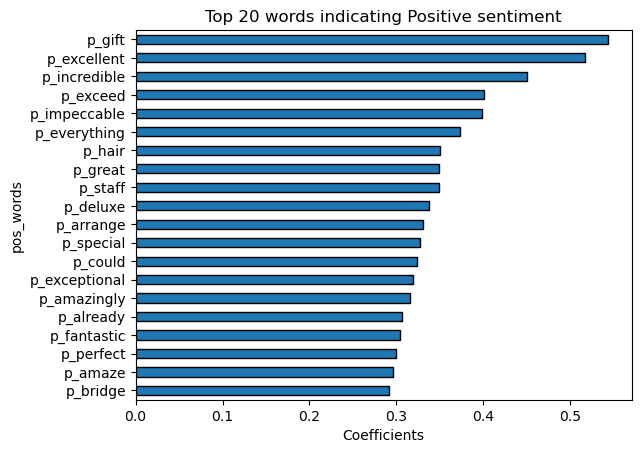

<Figure size 1500x1000 with 0 Axes>

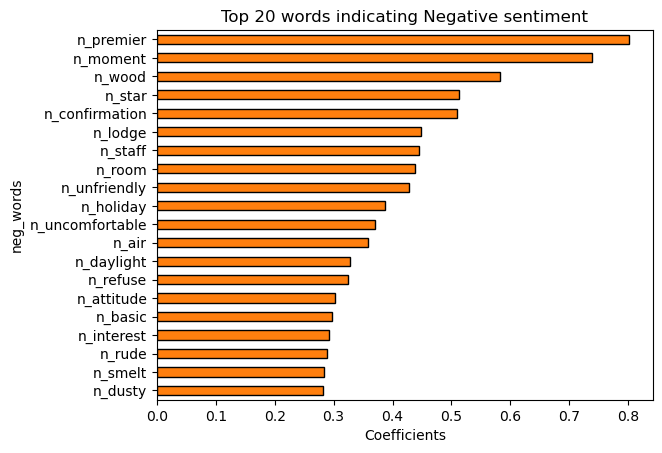

In [17]:
# Create dataframe with regression coefficients values
# and set index to column names
word_counts = pd.DataFrame({"coefficients": (LR_model.coef_[0]).round(3)},
                           index = X_train.columns
                          ).sort_values("coefficients", ascending=True)

# Splitting the words to positive and negative based on the first letter
# Positive words start with 'p' and negative words start with 'n'
word_counts_pos = word_counts[word_counts.index.str.startswith('p')]
word_counts_neg = word_counts[word_counts.index.str.startswith('n')]

# Top 20 positive words
top_20_pos_words = word_counts_pos.tail(20)

# Top 20 negative words
top_20_neg_words = word_counts_neg.head(20)

# Graphing top 20 positive words and bottom 20 negative words
plt.figure(figsize=(15, 10))
top_20_pos_words.plot(kind="barh", color = 'tab:blue', edgecolor = 'black', legend=False)
plt.title("Top 20 words indicating Positive sentiment")
plt.xlabel("Coefficients")
plt.ylabel('pos_words')
plt.show();

plt.figure(figsize=(15, 10))
abs(top_20_neg_words[::-1]).plot(kind="barh", color = 'tab:orange', edgecolor = 'black', legend=False)
plt.title('Top 20 words indicating Negative sentiment')
plt.xlabel('Coefficients')
plt.ylabel('neg_words')
plt.show();

In [18]:
# List out the top 20 positive words
top_20_pos_words

,coefficients
p_bridge,0.292
p_amaze,0.296
p_perfect,0.300
p_fantastic,0.304
p_already,0.307
p_amazingly,0.316
p_exceptional,0.319
p_could,0.324
p_special,0.328
p_arrange,0.331


In [19]:
# Lists out the top 20 negative words
top_20_neg_words

,coefficients
n_premier,-0.802
n_moment,-0.738
n_wood,-0.582
n_star,-0.513
n_confirmation,-0.509
n_lodge,-0.448
n_staff,-0.445
n_room,-0.438
n_unfriendly,-0.428
n_holiday,-0.387


From the graphs and tables above, we can see that `p_gift` is the word that is most predictive of a good review with the highest regression coefficient of **0.544**. `n_premier` is the word that is the most predictive of a bad review with the lowest coefficient of **-0.802**.

#### Principal Component Analysis (PCA)

Now, we want to reduce the dimensionality of the dataset using PCA. Once that is done, we want to observe the relationship between the number of dimensions and run-time for a logistic regression.

We will use the independent (scaled) and dependent variables identified [earlier](#scaling). We will set up a PCA where we want to keep 90% of the variance. We will then transform our scaled X_train and X_test data with the PCA model. Then we will fit our PCA transformed data into the logistic regression model.

In [20]:
# Lets say we want to keep 90% of the variance
my_PCA = PCA(n_components = 0.9)
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

# Shape of datasets
print(f'Shape of original train set: {X_train_scaled.shape}')
print(f'Shape of PCA transformed train set: {X_train_PCA.shape}')

Shape of original train set: (12798, 2743)
Shape of PCA transformed train set: (12798, 1891)


In [21]:
# PCA transformed LR model
LR_PCA = LogisticRegression(max_iter = 1000)
LR_PCA.fit(X_train_PCA,y_train)

# Accuracy Score
print(f'PCA transformed LR Train Accuracy Score: {(LR_PCA.score(X_train_PCA, y_train)).round(3)}')
print(f'PCA transformed LR Test Accuracy Score: {(LR_PCA.score(X_test_PCA, y_test)).round(3)}')

PCA transformed LR Train Accuracy Score: 0.855
PCA transformed LR Test Accuracy Score: 0.766


| Model | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: |
| Base LR Model | 0.886 | 0.733 |
| PCA transformed LR Model | 0.855 | 0.766 |

After reducing the dimensionality with PCA, we see that the accuracy score of the testing and training sets did not change much between the base LR model and the PCA transformed LR model.

Let's look at the run-times and see how the number of dimensions affect the run-time for logistic regression.

In [22]:
# Comparing run-times of the original LR model and the PCA transformed LR model
# Original LR model from above
start_time_LR = time.time()
LR_model.fit(X_train_scaled, y_train)
end_time_LR = time.time()
total_time_LR = end_time_LR - start_time_LR
print(f'Original LR Model run-time: {total_time_LR:.3f} seconds.')

# PCA transformed LR model
start_time_LR_PCA = time.time()
LR_PCA.fit(X_train_PCA, y_train)
end_time_LR_PCA = time.time()
total_time_PCA = end_time_LR_PCA - start_time_LR_PCA
print(f'PCA transformed LR Model run-time: {total_time_PCA:.3f} seconds.')

Original LR Model run-time: 3.272 seconds.
PCA transformed LR Model run-time: 2.185 seconds.


We see that the PCA transformed LR model has a faster run-time at **2.253** seconds compared to the original LR model at **3.334** seconds. This shows that as the number of dimensions in the dataset decreases, the computational run-time of fitting a logistic regression model decreases as well. Therefore, reducing the dimensionality of the data using PCA can help to speed up the training and prediction time of a logistic regression model.

#### Advantages and Disadvantages of Dimensionality Reduction

The **advantage** of dimensionality reduction is that reducing the number of features essentially discards information by compressing/projecting our data down into a lower dimensionality. This results in less storage space being required. It also reduces overfitting and reduces the computational time of our model (as seen above).

The **disadvantage** of dimensionality reduction is that we are losing some data. This can impact the performance of subsequent training algorithms. It can also be a problem if we are trying to interpret the transformed features. There's also a layer of complexity added when presenting the results to others.

[[Back to top]](#toc)

***

### K-Nearest Neighbors Classifier <a class="anchor" id="knn"></a>

Next, we will make a model with the K-Nearest Neighbors Classifier. We will use the previously saved independent (scaled) and dependent variables from the [section above](#scaling). It is important to scale the data because KNN is a distance-based model. We will first instantiate then fit the data to the model and then calculate the training and testing accuracy scores.

In [23]:
# Instantiate and fit the KNN model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_scaled, y_train)

# Accuracy Score
print(f'KNN Train Accuracy Score: {(KNN_model.score(X_train_scaled, y_train)).round(3)}')
print(f'KNN Test Accuracy Score: {(KNN_model.score(X_test_scaled, y_test)).round(3)}')

KNN Train Accuracy Score: 0.751
KNN Test Accuracy Score: 0.637


We now have a baseline KNN model. The accuracy scores for the train (**0.751**) and test (**0.637**) set for KNN was not great. We can see if we can improve the accuracy by adjusting some parameters.

| Model | n_neighbors | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: | :-: |
| Base KNN Model | 5 | 0.751 | 0.637 |

#### Relationship between the number of observations and run-time for KNN

KNN is a distance-based algorithm and it uses the proximity of other data points to make classifications or predictions about the grouping of an individual data point. It is said that if the training set is several thousand elements long, we could spend days doing calculations. This makes KNN a computationally expensive model. Now, we want to explore the relationship between the number of observations and the run-time for KNN and see what we find.

To do that, we want to split our data where sets of data range from 10% to 100% of the whole dataset. We will use the `train-test-split` technique to help us achieve this. After splitting the data, we want to instantiate the KNN model and fit the model with the data that we split. Then we can calculate the run-time. This will be done for all the data splits. Once, we gathered all the run-times, we will plot the run-times on the graph with the corresponding percent of data that was split. There is an extra step to calculating the percent data that was used. The data range that we used for the train-test-split corresponds to the "test" set when we want the percentage of the "train" set. To get this percentage, we would just need to subtract the percent used for `test_size` from **1**.

In [24]:
# Looping through different splits and calculating the run-time
KNN_percent_range = np.arange(0.1, 1, 0.1)

KNN_percent_obs = []
KNN_run_time = []

for n in KNN_percent_range:
    X_train_obs, _, y_train_obs, _ = train_test_split(X_train_scaled,y_train, test_size = n,\
                                                      random_state = 42, stratify = y_train)
    
    # Instantiate and fit the model
    KNN_model2 = KNeighborsClassifier()
    KNN_model2.fit(X_train_obs, y_train_obs)
    
    # Computes run-time
    start_time_KNN = time.time()
    KNN_model2.fit(X_train_obs, y_train_obs)
    end_time_KNN = time.time()
    total_time_KNN = end_time_KNN - start_time_KNN
    
    # Append values to empty list
    KNN_run_time.append(total_time_KNN)
    KNN_percent_obs.append(1-n) # We want the train split percentage and not the test split

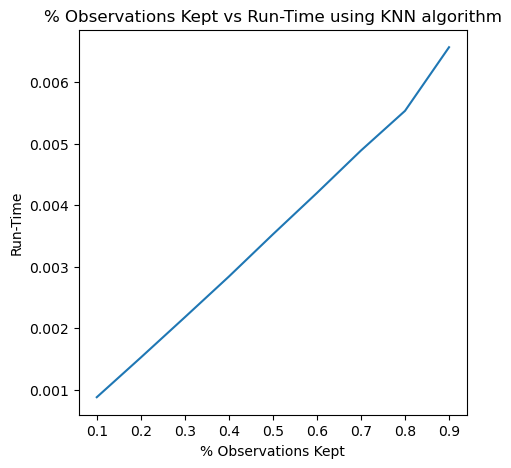

In [25]:
# Plots figure
plt.figure(figsize=(5, 5))
plt.plot(KNN_percent_obs, KNN_run_time)
plt.title('% Observations Kept vs Run-Time using KNN algorithm')
plt.ylabel('Run-Time')
plt.xlabel('% Observations Kept')
plt.show()

From the graph above, we see that the relationship between the number of observations and run-time for KNN is linear. The number of observations is directly proportional to the run-time. Like what was stated above, the more observations we have, the longer it will take for KNN to do calculations.

#### One advantage and one disadvantage of reducing the number of observations

The advantages and disadvantages of reducing the number of observations in the KNN model is similar to the advantages and disadvantages of dimensionality reduction.

One **advantage** of reducing the number of observations is that it can reduce the run-time of our model. There are less calculations so it will take less time to train and test the data.

One **disadvantage** of reducing the number of observations is that we are losing some data. This can impact the performance of subsequent training algorithms or if we trying to explain the variance in our dataset.

#### Optimal value for K in the KNN algorithm

We can look for the optimal value for K in the KNN algorithm. We cannot use the train and test sets to adjust this parameter. We would need to create a *validation set* to use to test for the optimal K. Validation sets are used to help validate our model's performance. To create the validation set, we would need to split the training data where 70% is the training set and 30% is the validation set.
<a class="anchor" id="train-validation-split"></a>

In [26]:
# Splitting the data into train and validation set
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, \
                                                    test_size=0.30, random_state=42, stratify=y_train)

# Checking the shape
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_val.shape}')
print(f'Shape of train set: {X_train2.shape}')

Shape of test set: (4267, 2743)
Shape of validation set: (3840, 2743)
Shape of train set: (8958, 2743)


Now that the training set has been split, we need to scale the new training and validation sets because KNN calculates distance between data points. We will also use the `StandardScaler()` to scale the data.

In [27]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2_scaled = scaler.transform(X_train2)
X_val_scaled = scaler.transform(X_val)

After scaling the data, we want to loop through K values and fit the model with our data. We will then obtain the accuracy scores on both the training and validation sets. For K values, we can loop through a range from 1 to 51. However, we want to avoid even numbers because KNN does majority votes on its neighbors. We can then plot accuracy as a function of K. Since the validation set is used to validate model performance, we are looking for the highest validation score. The corresponding K value will be the optimal K value for our KNN model.

In [28]:
# Looping through K values
K_range = list(range(1, 51, 2)) # avoid even numbers because KNN does majority vote on its neighbors

train_scores = []
validation_scores = []

for K in K_range:
    
    # Instantiate and fit the model
    my_KNN = KNeighborsClassifier(n_neighbors = K)
    my_KNN.fit(X_train2_scaled,y_train2)
    
    # Train on traning set
    train_scores.append((my_KNN.score(X_train2_scaled,y_train2)).round(3))
    
    # Score on validation set
    validation_scores.append((my_KNN.score(X_val_scaled,y_val)).round(3))

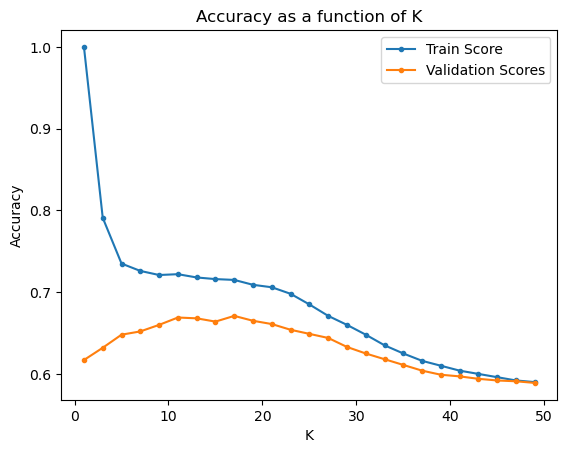

The best model has K =  17


In [29]:
# Plotting the training and validation scores
plt.figure()
plt.plot(K_range, train_scores, label = "Train Score", marker = '.')
plt.plot(K_range, validation_scores, label = "Validation Scores",marker = '.')
plt.title('Accuracy as a function of K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

knn_which_max = np.array(validation_scores).argmax()

print("The best model has K = ", K_range[knn_which_max])

The optimal K value is **17**. We will adjust the K value of our model and see what the training and testing accuracy scores are.

In [30]:
# Instantiate and fit the KNN model
KNN_model = KNeighborsClassifier(n_neighbors = 17)
KNN_model.fit(X_train_scaled, y_train)

# Accuracy Score
print(f'KNN Train Accuracy Score: {(KNN_model.score(X_train_scaled, y_train)).round(3)}')
print(f'KNN Test Accuracy Score: {(KNN_model.score(X_test_scaled, y_test)).round(3)}')

KNN Train Accuracy Score: 0.725
KNN Test Accuracy Score: 0.684


| Model | n_neighbors | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: | :-: |
| Base KNN Model | 5 | 0.751 | 0.637 |
| Optimal KNN Model | 17 | 0.725 | 0.684 |

With the optimal n_neighbors as **17**, the training accuracy score is **0.725** and the testing accuracy score is **0.684**. There was a decrease in the train accuracy score of about **0.026** however, our test accuracy score increase by **0.047**.

#### Issue with splitting the data into train and validation sets after performing vectorization

The issue with splitting the data into train and validation sets after perforing vectorization is that there may be a chance of the validation dataset leaking into the training dataset. We would be using information from the validation set to vectorize our whole dataset. It would be like we were peeking at our unseen validation set. We should always split our data before performing vectorization.

***

### Decision Tree <a class="anchor" id="dt"></a>

In this section, we will be looking at the Decision Tree Classifier algorithm. We can go ahead and fit the model. We do not need to scale the data because this algorithm is not sensitive to the the variance in the data.

In [31]:
# Instantiate and fit the DT model
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

# Accuracy Score
print(f'DT Train Accuracy Score: {(DT_model.score(X_train, y_train)).round(3)}')
print(f'DT Test Accuracy Score: {(DT_model.score(X_test, y_test)).round(3)}')


DT Train Accuracy Score: 1.0
DT Test Accuracy Score: 0.696


We now have a baseline DT model. Note the accuracy score for the training (**1.0**) and testing (**0.702**) sets. The model is overfitting the data. It completely fits the training data but fails to generalize the testing unseen data.

#### Optimal value for the maximum depth 

We can look for the optimal value for the maximum depth in the DT algorithm. Similar to finding the optimal value of K in the KNN model, we cannot use the train and test sets to adjust maximum depth. We would need to create a validation set to use to test for the optimal maximum depth. For the validation set, we would need to split the training data where 70% is the training set and 30% is the validation set.

We already split the data into train and validation sets in the [previous section](#train-validation-split). We do not need to repeat this step and can use that split for this section as well.

In [32]:
# Checking the shape
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_val.shape}')
print(f'Shape of train set: {X_train2.shape}')

Shape of test set: (4267, 2743)
Shape of validation set: (3840, 2743)
Shape of train set: (8958, 2743)


Now, we can loop through different values of max_depth to find the most optimal max_depth based on the accuracy of the validation set. Similar to how we optimized the K value for KNN, the max_depth value corresponding to the highest validation score is the optimal max_depth value for our DT model.

In [33]:
# Looping max_depth
max_depth_range = list(range(1,21))

train_scores2 = []
validation_scores2 = []

for max_depth in max_depth_range:
    
    # Instantiate and fit the model
    my_DT = DecisionTreeClassifier(max_depth = max_depth)
    my_DT.fit(X_train2,y_train2)
    
    # train on traning set
    train_scores2.append((my_DT.score(X_train2,y_train2)).round(3))
    
    # score on validation set
    validation_scores2.append((my_DT.score(X_val,y_val)).round(3))

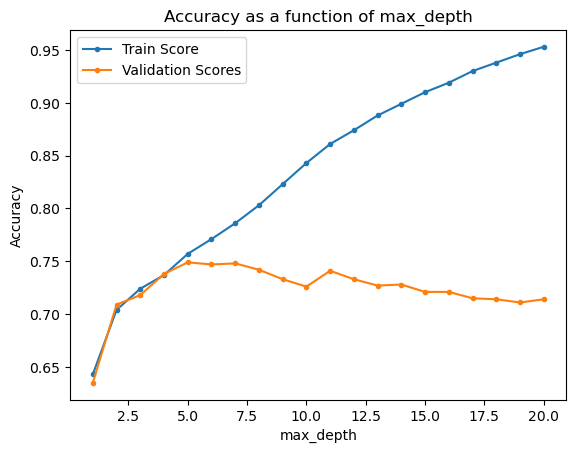

The best model has max_depth =  5


In [34]:
# Plotting the training and validation scores
plt.figure()
plt.plot(max_depth_range, train_scores2, label = "Train Score",marker='.')
plt.plot(max_depth_range, validation_scores2, label = "Validation Scores",marker='.')
plt.title('Accuracy as a function of max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

dt_which_max = np.array(validation_scores2).argmax()

print("The best model has max_depth = ", max_depth_range[dt_which_max])


The optimal max_depth is 5. We will now input that into our DT model and see what the training and testing accuracy scores are.

In [35]:
# Instantiate and fit the DT model
DT_model2 = DecisionTreeClassifier(max_depth = 5)
DT_model2.fit(X_train, y_train)

# Accuracy Score
print(f'DT Train Accuracy Score: {(DT_model2.score(X_train, y_train)).round(3)}')
print(f'DT Test Accuracy Score: {(DT_model2.score(X_test, y_test)).round(3)}')

DT Train Accuracy Score: 0.755
DT Test Accuracy Score: 0.74


| Model | max_depth | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: | :-: |
| Base DT Model | None | 1.0 | 0.702 |
| Optimal DT Model | 7 | 0.755 | 0.740 |

With the optimal max_depth of 5, the training accuracy score is **0.755** and the testing accuracy score is **0.740**. We can see that the base DT model was overfitted. The model was fitted better with the optimal max_depth hyperparameter.

***

#### Advantages of Decision Trees over KNN

One advantage of Decision Trees over KNN is that they are more interpretable and easy to understand. This is because they are a visual model and they visualize the decision-making process and we can see how the decisions are made at each node. Another advantage Decision Trees have over KNN is that they can handle both numerical and categorical data without preprocessing or normalizing the data.

#### Weaknesses of Decision Trees (classification or regression trees)

One weakness of Decision Trees is that they tend to overfit and would require priuning. This means we would have to adjust the `max_depth` and/or `min_samples_leaf`. Another weakness of Decision Trees is that they are sensitive to minor changes in data. This can introduce serious biases as you move further down the tree. This means they don't have the same predictive accuracy as other approaches.

***

### Purpose of Validation Sets <a class="anchor" id="val-sets"></a>

As stated above, the purpose of the validation set is to find and optimize the best model by tuning the model's hyperparameters. The validation set is completely separate from the test set. It is a sample of data split from the training set that is used to give an unbiased estimate of the model's performance. That's why it is the best method to use to find optimal parameters for models.

***

### 5-fold Cross Validation on a Logistic Regression Model <a class="anchor" id="5-fold"></a>

Now, we want to optimize the hyperparameters of our model using a 5-fold cross validation. We will optimize the C hyperparameter in the logistic regression model. The C hyperparameter with the highest validation score will be give us the best model.


In [36]:
# Looping through C values
cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Do some cross validation
for c in C_range:
    LR_model_cv = LogisticRegression(C=c,random_state=1, max_iter = 1000)
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model_cv, X_train_scaled, y_train, cv = 5))
    
    cross_validation_scores.append(cv_score)

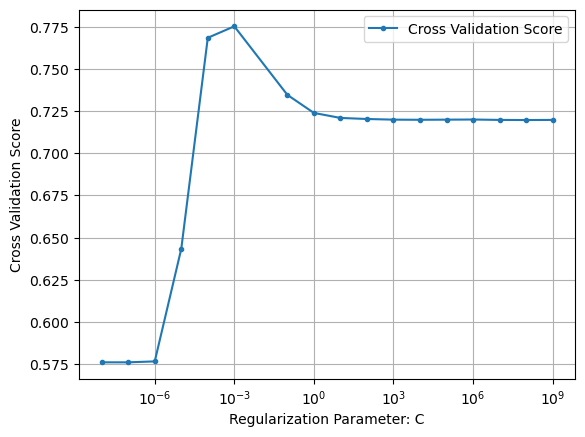

The best model has C =  0.001


In [37]:
# Plot graph
plt.figure()
plt.plot(C_range, cross_validation_scores, label = "Cross Validation Score", marker = '.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ", C_range[which_max])

From the plot, we see that the best model had the C parameter equal to **0.001**. We will now instantiate and fit the model with the optimal C value and find the training and testing accuracy scores. 

In [38]:
# Instantiate model
best_LR_model = LogisticRegression(C = 0.001, random_state=1, max_iter = 1000)

# Fit model
best_LR_model.fit(X_train_scaled, y_train)

# Score model
print(f'Train Accuracy Score: {(best_LR_model.score(X_train_scaled, y_train)).round(3)}')
print(f'Test Accuracy Score: {(best_LR_model.score(X_test_scaled, y_test)).round(3)}')

Train Accuracy Score: 0.854
Test Accuracy Score: 0.778


| Model | Hyperparamter | Train Accuracy Score | Test Accuracy Score |
| :-: | :-: | :-: | :-: |
| 5-fold Cross Validation LR Model | C = 0.001, solver = 'lbfgs', max_iter = 1000 | 0.854 | 0.778 |
| PCA transformed on Base LR Model | n_components = 0.9 | 0.855 | 0.766 |
| Optimal DT Model | max_depth = 5 | 0.755 | 0.740 |
| Base LR Model | solver = 'lbfgs', max_iter = 1000, C = 1.0 | 0.886 | 0.733 |
| Base DT Model | max_depth = None | 1.0 | 0.702 |
| Optimal KNN Model | n_neighbors = 17 | 0.725 | 0.684 |
| Base KNN Model | n_neighbors = 5 | 0.751 | 0.637 |

The table above lists the models, their hyperparamters, training and testing accuracy scores. It is ordered by testing accuracy score in descending order. Comparing the training and testing accuracy scores with the other logistic regression models, we see that the model that went through the 5-fold cross validation has the best test accuracy score (**0.778**) and a decent train accuracy score (**0.854**).

If we look at the optimized models, the model with the best test score would be the best model. We would also have to pay attention to see if the data was overfitted at all. Out of the optimized models, the 5-fold cross validation logisitic regression model had the best test score and the data did not seem overfitted.

### Confusion Matrix <a class="anchor" id="confusion-matrix"></a>

We can create a confusion matrix using the best model, the 5-fold cross validation logisitic regression model. We can also print the classification report to see the different scores.

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



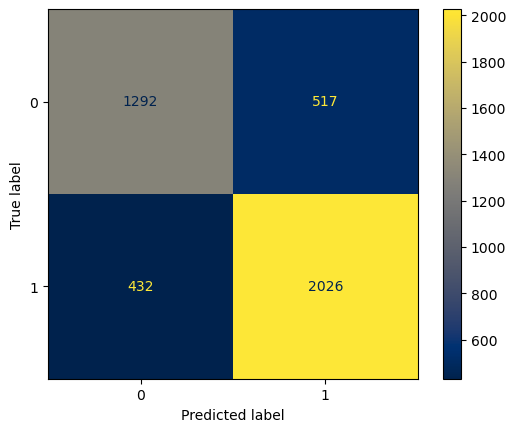

In [39]:
# Confusion matrix with our best_LR_model
ConfusionMatrixDisplay.from_estimator(best_LR_model, X_test_scaled, y_test, cmap = 'cividis')

# Get class predictions
y_pred = best_LR_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

Let's recall what the Confusion Matrix tells us.

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0| **TN** | **FP** | 
|True Class 1| **FN** | **TP** | 

Looking at the classification report, we see that the `accuracy` is **0.78**. An accuracy of 0.78 means that the model correctly predicted the class for **78%** of all instances in the test set.

`Precision` measures the accuracy of the positive predictions. For class 0, a precision of **0.75** means that out of all instances predicted as class 0, **75%** were correctly classified as class 0 (true positives), while the **remaining 25%** were incorrectly classified as class 0 (false positives). Similarly, for class 1, a precision of **0.80** indicates that **80%** of instances predicted as class 1 were true positives, and **20%** were false positives.

`Recall` measures the ability to correctly identify positive instances. For class 0, a recall of **0.71** means that out of all instances that actually belong to class 0, **71%** were correctly identified as class 0 (true positives), while the **remaining 29%** were incorrectly classified as not class 0 (false negatives). Likewise, for class 1, a recall of **0.82** indicates that **82%** of instances belonging to class 1 were true positives, and **18%** were false negatives.

The `F1-score`, being the harmonic mean of precision and recall, provides a balance between these two metrics. It considers both false positives and false negatives, thus offering a more comprehensive evaluation of the model's performance. In this case, we can observe a reasonable balance between precision and recall for both class 0 and class 1.

Overall, this model is performing well as indicated by the accuracy of **78%** and the balanced precision, recall, and F1-score for both classes. By examining these metrics alongside the confusion matrix, we gain a deeper understanding of the model's classification performance and its ability to correctly classify instances across different classes.

[[Back to top]](toc)

***

### Creating a New Feature <a class="anchor" id="new-feature"></a>

When observing the features, we want to see how the features impact the accuracy of our model. We also want to see what other features we can think of that can improve our accuracy score. 

We wanted to create a feature that informs us what season the review was made. This is an important feature because seasonality affects the type of trip that was made and if was a personal or business trip. It may also influence the type of review that was made. This is why we should add this feature as it will improve our model accuracy.

Since our data is already split into training and testing sets, we can create the feature in each individual set. Since we want to add a feature to the dataset, let's create a copy of the training and testing dataframes so that we do not make changes to the original dataset. Then, we can take a look at the `month_of_review` column in the training and testing set.

In [40]:
# Creating a copy of the training and testing dataframes
train_final = train.copy()
test_final = test.copy()

In [41]:
# Viewing the "month_of_review" in the training set
train_final['month_of_review'].value_counts()

3     1192
2     1192
12    1146
1     1105
8     1097
4     1095
5     1049
7     1030
6     1011
10     992
11     965
9      924
Name: month_of_review, dtype: int64

In [42]:
# Viewing the "month_of_review" in the testing set
test_final['month_of_review'].value_counts()

1     397
2     397
12    388
3     374
5     374
8     365
4     356
10    355
7     346
6     332
11    319
9     264
Name: month_of_review, dtype: int64

Now, we know what values are in the `month_of_review` column for both the training and testing sets. We can create a function to input the season based on the month number.

The function we want to create takes in the month number and based on the rules we set, will create a new column in the dataframe called `season`, and will input the correct season. The rules are as follows: months that are 12, 1, and 2 are classified as `winter`, months that are 3, 4, and 5 are classified as `spring`, months that are 6, 7, and 8 are classified as `summer`, and months that are 9, 10, and 11 are classified as `fall`. We will then apply the function to both of our training and testing dataframes.

In [43]:
def get_season(month):
    '''
    This function takes a month as input. Depending on the 
    month number, one of four seasons will be returned.
    
    Parameters:
    -----------
    month: month in numerical format
    
    Returns:
    --------
    output: one of four seasons
    
    ''' 
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

In [44]:
# Apply the get_season function to train and test dataframes
# Input will be new column named "season"
train_final['season'] = train_final['month_of_review'].apply(get_season)
test_final['season'] = test_final['month_of_review'].apply(get_season)

In [45]:
# Viewing the values counts of the seasons in the training and testing datasets
print(train_final['season'].value_counts())
print(test_final['season'].value_counts())

winter    3443
spring    3336
summer    3138
fall      2881
Name: season, dtype: int64
winter    1182
spring    1104
summer    1043
fall       938
Name: season, dtype: int64


Now that we created the `season` column for both dataframes, we want to one-hot encode (OHE) this column to change the categorical column into a numerical column. We see that `fall` has the least amount of value counts. Therefore, when we OHE the `season` column, we can choose to drop the "fall" column from both dataframes.

In [46]:
# OHE "season" column in training and testing dataframes
train_dummies = pd.get_dummies(train_final['season'])
train_dummies.drop(columns = 'fall', inplace = True)

test_dummies = pd.get_dummies(test_final['season'])
test_dummies.drop(columns = 'fall', inplace = True)

Now that we have OHE the `season` column in both dataframes, we can add the dummy dataframe to the original dataframe. We can also drop the original `season` column.

In [47]:
# Combining dummy df and original dataframe for both the training and testing data
train_final = pd.concat([train_final, train_dummies], axis = 1)
test_final = pd.concat([test_final, test_dummies], axis = 1)

In [48]:
# Dropping the "season" column from both dataframes
train_final.drop(columns = 'season', inplace = True)
test_final.drop(columns = 'season', inplace = True)

In [49]:
# Checking the training dataframe
train_final.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,spring,summer,winter
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,1,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,1,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,1,1,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,1
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Checking the testing dataframe
test_final.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,spring,summer,winter
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,1,0,1,0
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,1,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,1,0


#### Identify independent and dependent variables, then scale the data

Now that we have successfully added the new feature to the dataframe, we can run the 5-fold cross validation on a logistic regression model that we did [earlier](#5-fold) on our new datasets.

We first need to identify the independent and dependent variables. Once they have been identified, we would need to scale the data before fitting it into our model.

In [51]:
# Define independent and dependent train variables
X_train_new = train_final.drop(columns = 'rating')
y_train_new = train_final.rating

# Define independent and dependent test variables
X_test_new = test_final.drop(columns = 'rating')
y_test_new = test_final.rating

# Shape of the independent and dependent variables
print('Shape of the independent variables in the trainset: ', X_train_new.shape)
print('Shape of the dependent variables in the trainset: ', y_train_new.shape)
print('Shape of the independent variables in the testset: ', X_test_new.shape)
print('Shape of the dependent variables in the testset: ', y_test_new.shape)

Shape of the independent variables in the trainset:  (12798, 2746)
Shape of the dependent variables in the trainset:  (12798,)
Shape of the independent variables in the testset:  (4267, 2746)
Shape of the dependent variables in the testset:  (4267,)


In [52]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new_scaled = scaler.transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

#### 5-fold cross validation on logistic regression model with new feature

In [53]:
# Looping through C values
cross_validation_scores2 = []

C_range2 = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

# Do some cross validation
for c in C_range2:
    LR_model_cv2 = LogisticRegression(C=c,random_state=1, max_iter = 1000)
    
    # the cross validation score (mean of scores from all folds)
    cv_score2 = np.mean(cross_val_score(LR_model_cv2, X_train_new_scaled, y_train_new, cv = 5))
    
    cross_validation_scores2.append(cv_score2)

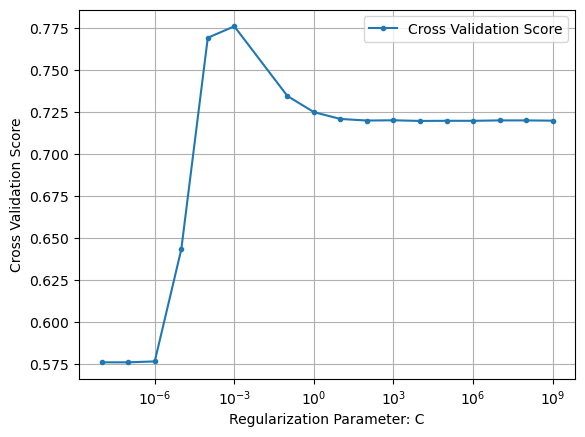

The best model has C =  0.001


In [54]:
# Plot graph
plt.figure()
plt.plot(C_range2, cross_validation_scores2, label = "Cross Validation Score", marker = '.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

which_max2 = np.array(cross_validation_scores2).argmax()

print("The best model has C = ", C_range[which_max2])

From the plot, we see that the best model had the C parameter equal to **0.001**. We will now instantiate and fit the model with the optimal C value and find the training and testing accuracy scores. 

In [55]:
# Instantiate model
best_LR_model2 = LogisticRegression(C = 0.001, random_state=1, max_iter = 1000)

# Fit model
best_LR_model2.fit(X_train_new_scaled, y_train_new)

# Score model
print(f'Train Accuracy Score: {(best_LR_model2.score(X_train_new_scaled, y_train_new)).round(3)}')
print(f'Test Accuracy Score: {(best_LR_model2.score(X_test_new_scaled, y_test_new)).round(3)}')

Train Accuracy Score: 0.854
Test Accuracy Score: 0.778


| Model | Hyperparamter | Train Score | Test Score |
| :-: | :-: | :-: | :-: |
| 5-fold Cross Validation LR Model | C = 0.001, solver = 'lbfgs', max_iter = 1000 | 0.854 | 0.778
| 5-fold Cross Validation LR Model + new feature | C = 0.001, solver = 'lbfgs', max_iter = 1000 | 0.854 | 0.778 |

Sadly, the accuracy score did not improve. This may makes sense because we did not really add new information to the dataset. We only used an existing feature to create another feature.

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1809
           1       0.80      0.82      0.81      2458

    accuracy                           0.78      4267
   macro avg       0.77      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



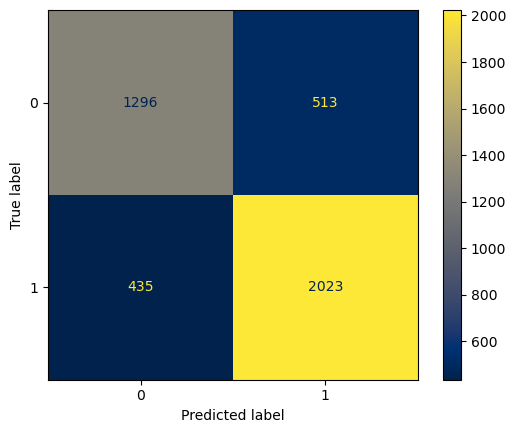

In [56]:
# Confusion matrix with our best_LR_model
ConfusionMatrixDisplay.from_estimator(best_LR_model2, X_test_new_scaled, y_test_new, cmap = 'cividis')

# Get class predictions
y_pred2 = best_LR_model2.predict(X_test_new_scaled)

# Print classification report
print(classification_report(y_test_new, y_pred2))

Like the confusion matrix done for the first 5-fold cross validation [above](#confusion-matrix), the values for precision, recall, f1_score, and accuracy are all the same. This showed that the new feature that we created did not impact the model at all.

***

## Conclusion <a class="anchor" id="conclusion"></a>

In this notebook, we used the processed hotel reviews to model different machine learning algorithms. We created the base models and optimized the parameters to make better models. We created a new feature to see if it increased the accuracy of the model. We also used the confusion matrix and classification reports to see if we created the best model for our data. Unfortunately, the new feature did not improve the accuracy on our model. Further work is needed to create new features and then to see if the accuracy score of the model will improve.

[[Back to top]](#toc)